In [111]:
from sympy import Symbol, Integral, solve
import sympy as sp

In [112]:
from matplotlib import pyplot as plt
import numpy as np

In [113]:
x = sp.Symbol('x')
c1 = sp.Symbol('c1')
c2 = sp.Symbol('c2')
r=-0.84375 #cortante no ponto inicial!
slope0=0.085946 #start
deflection1=0 #end
l=1000
ei=666600
q=-0.0010
m0=-656.25 #momento no ponto inicial
m_x=(-m0+r*x+q*x**2/2)/ei

In [114]:
slope = Integral(m_x, x).doit()+c1
slope

c1 - 2.5002500250025e-10*x**3 - 6.32875787578758e-7*x**2 + 0.000984473447344734*x

In [115]:
deflection = Integral(slope, x).doit()+c2
deflection

1.0*c1*x + c2 - 6.25062506250625e-11*x**4 - 2.10958595859586e-7*x**3 + 0.000492236723672367*x**2

In [116]:
slope_value0 = slope.subs(x,0)
value_c1 = solve(-slope_value0+slope0, c1)
value_c1

[0.0859460000000000]

In [117]:
slope = slope.subs(c1, value_c1[0])
slope

-2.5002500250025e-10*x**3 - 6.32875787578758e-7*x**2 + 0.000984473447344734*x + 0.085946

In [118]:
deflection = deflection.subs(c1, value_c1[0])
deflection

c2 - 6.25062506250625e-11*x**4 - 2.10958595859586e-7*x**3 + 0.000492236723672367*x**2 + 0.085946*x

In [119]:
deflection_value1 = deflection.subs(x, l)
value_c2 = solve(deflection_value1-deflection1, c2)
value_c2

[-304.717877187719]

In [120]:
deflection = deflection.subs(c2, value_c2[0])
deflection

-6.25062506250625e-11*x**4 - 2.10958595859586e-7*x**3 + 0.000492236723672367*x**2 + 0.085946*x - 304.717877187719

In [121]:
deflection.subs(x, 500)

-168.962161416142

In [122]:
slope.subs(x,500)

0.388710651465147

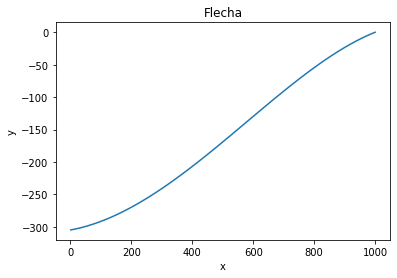

In [123]:
xs = np.linspace(1,1000,100)
ys = []
for i in xs:
    ys.append(deflection.subs(x,i))
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Flecha')
plt.show()

In [124]:
shear = r + Integral(q, x).doit()
shear

-0.001*x - 0.84375

In [125]:
print(shear.subs(x, 0))
print(shear.subs(x, 1000))

-0.843750000000000
-1.84375000000000


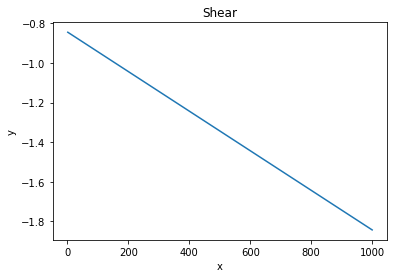

In [126]:
xs = np.linspace(1,1000,100)
ys = []
for i in xs:
    ys.append(shear.subs(x,i))
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Shear')
plt.show()

In [127]:
moment = m0 - Integral(shear,x).doit()
moment

0.0005*x**2 + 0.84375*x - 656.25

In [128]:
print(moment.subs(x, 0))
print(moment.subs(x, 1000))

-656.250000000000
687.500000000000


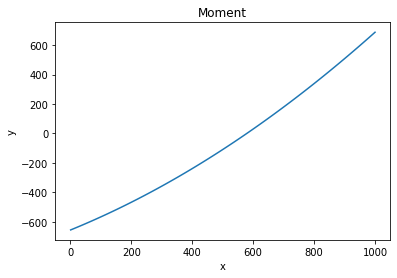

In [129]:
xs = np.linspace(1,1000,100)
ys = []
for i in xs:
    ys.append(moment.subs(x,i))
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Moment')
plt.show()